# 马尔科夫链：不可约性与遍历性

```{index} single: 马尔科夫链: 不可约性与遍历性
```

除了 Anaconda 中的库外，这个讲座还需要以下库：

In [1]:
!pip install quantecon

## 概述

本讲座是我们{doc}`早期关于马尔科夫链的讲座 <markov_chains_I>`的延续。

具体来说，我们将介绍不可约性和遍历性的概念，并了解它们与平稳性的联系。

不可约性描述了马尔科夫链在系统中移动任意两个状态之间的能力。

遍历性是一种样本路径属性，描述了系统在长时间内的行为。

正如我们将看到的：

* 不可约的马尔科夫链保证存在唯一的平稳分布，而
* 遍历的马尔科夫链生成满足大数定律版本的时间序列。

这些概念一起为理解马尔科夫链的长期行为提供了基础。

让我们从一些标准导入开始：

In [2]:
import matplotlib.pyplot as plt
import quantecon as qe
import numpy as np

import matplotlib as mpl
FONTPATH = "fonts/SourceHanSerifSC-SemiBold.otf"
mpl.font_manager.fontManager.addfont(FONTPATH)
plt.rcParams['font.family'] = ['Source Han Serif SC']

(mc_irreducible)=
## 不可约性

为了解释不可约性，让我们设 $P$ 为一个固定的随机矩阵。

如果对于某个整数 $t\ge 0$，$P^t(x,y)>0$，则称状态 $x$ 对状态 $y$ 是**可达的**。

当状态 $x$ 和 $y$ 彼此可达时，称它们**相互沟通**。

根据我们{ref}`前面讨论的 <finite_mc_mstp>`，这正意味着

* 状态 $x$ 最终可以从状态 $y$ 到达，且
* 状态 $y$ 最终可以从状态 $x$ 到达。

如果所有状态都相互沟通，则称随机矩阵 $P$ 是**不可约的**，即对于所有 $(x, y)$ 在 $S \times S$ 中，$x$ 和 $y$ 相互沟通。

````{prf:example}
:label: mc2_ex_ir
例如，考虑以下一组虚构家庭的财富转移概率。

```{image} /_static/lecture_specific/markov_chains_II/Irre_1.png
:name: mc_irre1
:align: center
```

我们可以将其转化为一个随机矩阵，在没有节点之间边的地方填充零。

$$
P :=
\begin{bmatrix} 
     0.9 & 0.1 & 0 \\
     0.4 & 0.4 & 0.2 \\
     0.1 & 0.1 & 0.8
\end{bmatrix} 
$$

从图中可以看出，这个随机矩阵是不可约的：我们可以最终从任何状态到达任何其他状态。
````

我们还可以使用 [QuantEcon.py](http://quantecon.org/quantecon-py) 的 `MarkovChain` 类来测试这一点：

In [3]:
P = [[0.9, 0.1, 0.0],
     [0.4, 0.4, 0.2],
     [0.1, 0.1, 0.8]]

mc = qe.MarkovChain(P, ('poor', 'middle', 'rich'))
mc.is_irreducible

True

````{prf:example}
:label: mc2_ex_pf

这是一个更加悲观的情景，贫困者永远保持贫困。

```{image} /_static/lecture_specific/markov_chains_II/Irre_2.png
:name: mc_irre2
:align: center
```

这个随机矩阵不是不可约的，因为例如，富有状态无法从贫困状态到达。
````

让我们确认这一点：

In [4]:
P = [[1.0, 0.0, 0.0],
     [0.1, 0.8, 0.1],
     [0.0, 0.2, 0.8]]

mc = qe.MarkovChain(P, ('poor', 'middle', 'rich'))
mc.is_irreducible

False

你可能已经明白，不可约性在长期结果中非常重要。

例如，在第二个图中，贫困是一种终身的困境，但在第一个图中不是。

我们稍后会回到这个问题。

### 不可约性与平稳性

我们在之前的讲座 {doc}`markov_chains_I` 中讨论了平稳分布的唯一性。

我们{prf:ref}`指出 <mc_po_conv_thm>`，当转移矩阵处处为正时，唯一性成立。

事实上，不可约性就足够了：

```{prf:theorem}
:label: mc_conv_thm

如果 $P$ 是不可约的，那么 $P$ 只有一个平稳分布。
```

有关证明，请参见 {cite}`sargent2023economic` 的第4章或 {cite}`haggstrom2002finite` 的定理5.2。

(ergodicity)=
## 遍历性

在不可约性下，还可以得到另一个重要结果：

````{prf:theorem}
:label: stationary

如果 $P$ 是不可约的，并且 $\psi^*$ 是唯一的平稳分布，那么对于所有 $x \in S$，

```{math}
:label: llnfmc0

\frac{1}{m} \sum_{t = 1}^m \mathbb{1}\{X_t = x\}  \to \psi^*(x)
    \quad \text{当 } m \to \infty
```

````

这里

* $\{X_t\}$ 是具有随机矩阵 $P$ 和初始分布 $\psi_0$ 的马尔科夫链。

* $\mathbb{1} \{X_t = x\} = 1$ 当且仅当 $X_t = x$，否则为0。

定理[4.3](llnfmc0)中的结果有时称为**遍历性**。

该定理告诉我们，随着时间趋于无穷大，链花费在状态 $x$ 的时间比例收敛到 $\psi^*(x)$。

(new_interp_sd)=
这为我们提供了另一种解释平稳分布的方法（假设不可约性成立）。

重要的是，这一结果对于任何 $\psi_0$ 都有效。

该定理与{doc}`大数定律 <lln_clt>`相关。

它告诉我们，在某些设置中，即使随机变量序列[不是独立同分布](iid_violation)，大数定律有时也成立。

(mc_eg1-2)=
### 示例：遍历性与失业

回顾我们关于就业/失业模型的截面解释{ref}`之前讨论过 <mc_eg1-1>`。

假设 $\alpha \in (0,1)$ 且 $\beta \in (0,1)$，因此不可约性成立。

我们看到平稳分布是 $(p, 1-p)$，其中

$$
p = \frac{\beta}{\alpha + \beta}
$$

在截面解释中，这是失业人员的比例。

根据我们最新的遍历性结果，这也是单个工人预期花费在失业状态的时间比例。

因此，从长远来看，人口的截面平均值和单个个体的时间序列平均值是一致的。

这是遍历性概念的一个方面。

(ergo)=
### 示例：汉密尔顿动力学

另一个示例是我们{ref}`之前讨论过的 <mc_eg2>`汉密尔顿动力学。

让 $\{X_t\}$ 是由这些动力学生成的样本路径。

令在时间段 $t=1, \ldots, n$ 内花费在状态 $x$ 上的时间比例为 $\hat p_n(x)$，则有

$$
    \hat p_n(x) := \frac{1}{n} \sum_{t = 1}^n \mathbb{1}\{X_t = x\}
    \qquad (x \in \{0, 1, 2\})
$$

马尔科夫链的{ref}`图 <mc_eg2>`表明它是不可约的，因此遍历性成立。

因此，我们期望当 $n$ 较大时，$\hat p_n(x) \approx \psi^*(x)$。

下图显示了当 $x=1$ 并且 $X_0$ 分别为 $0, 1$ 或 $2$ 时，$\hat p_n(x)$ 向 $\psi^*(x)$ 的收敛情况。

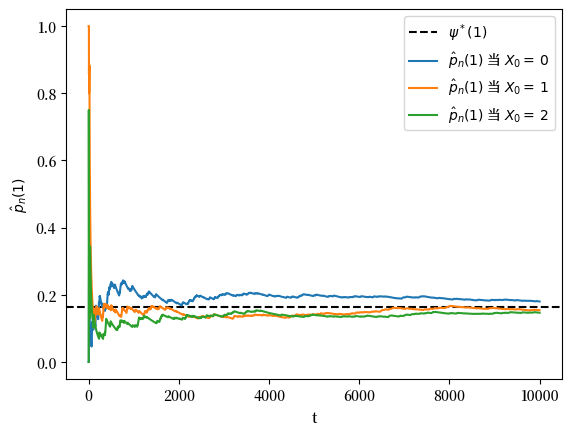

In [5]:
P = np.array([[0.971, 0.029, 0.000],
              [0.145, 0.778, 0.077],
              [0.000, 0.508, 0.492]])
ts_length = 10_000
mc = qe.MarkovChain(P)
ψ_star = mc.stationary_distributions[0]
x = 1  # 我们研究 psi^*(x) 的收敛情况

fig, ax = plt.subplots()
ax.axhline(ψ_star[x], linestyle='dashed', color='black', 
                label = fr'$\psi^*({x})$')
# 计算花费在状态0的时间比例，从不同的x_0开始
for x0 in range(len(P)):
    X = mc.simulate(ts_length, init=x0)
    p_hat = (X == x).cumsum() / np.arange(1, ts_length+1)
    ax.plot(p_hat, label=fr'$\hat p_n({x})$ 当 $X_0 = \, {x0}$')
ax.set_xlabel('t')
ax.set_ylabel(fr'$\hat p_n({x})$')
ax.legend()
plt.show()

你可能想尝试将 $x=1$ 改为 $x=0$ 或 $x=2$。

在这些情况下，遍历性都会成立。

### 示例：一个周期链

````{prf:example}
:label: mc2_ex_pc

让我们来看以下状态0和1的例子：

$$
P :=
\begin{bmatrix} 
     0 & 1\\
     1 & 0\\
\end{bmatrix} 
$$

转移图表明该模型是不可约的。

```{image} /_static/lecture_specific/markov_chains_II/example4.png
:name: mc_example4
:align: center
```

请注意，这里有一个周期循环——状态以规则的方式在两个状态之间循环。
````

毫不奇怪，这种属性被称为[周期性](https://stats.libretexts.org/Bookshelves/Probability_Theory/Probability_Mathematical_Statistics_and_Stochastic_Processes_(Siegrist)/16%3A_Markov_Processes/16.05%3A_Periodicity_of_Discrete-Time_Chains)。

尽管如此，该模型是不可约的，因此遍历性成立。

以下图表进行了说明：

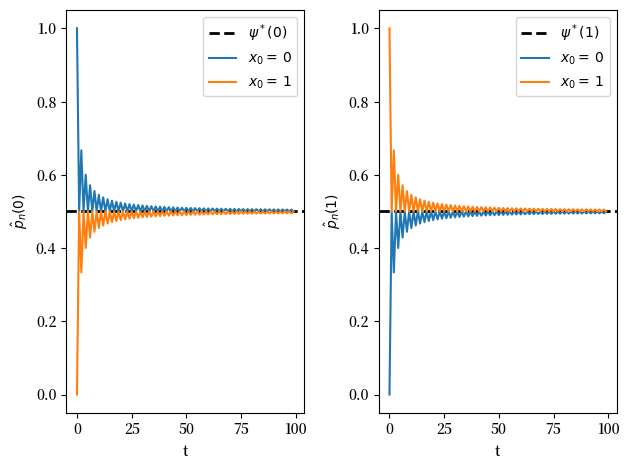

In [6]:
P = np.array([[0, 1],
              [1, 0]])
ts_length = 100
mc = qe.MarkovChain(P)
n = len(P)
fig, axes = plt.subplots(nrows=1, ncols=n)
ψ_star = mc.stationary_distributions[0]

for i in range(n):
    axes[i].axhline(ψ_star[i], linestyle='dashed', lw=2, color='black', 
                    label = fr'$\psi^*({i})$')
    axes[i].set_xlabel('t')
    axes[i].set_ylabel(fr'$\hat p_n({i})$')

    # 计算每个 x 花费的时间比例
    for x0 in range(n):
        # 从不同的 x_0 生成时间序列
        X = mc.simulate(ts_length, init=x0)
        p_hat = (X == i).cumsum() / np.arange(1, ts_length+1)
        axes[i].plot(p_hat, label=f'$x_0 = \, {x0} $')

    axes[i].legend()
plt.tight_layout()
plt.show()

该示例帮助强调了渐近平稳性是关于分布的，而遍历性是关于样本路径的。

在周期性链中，花费在某个状态的时间比例可以收敛到平稳分布。然而，每个状态的分布却不会收敛。

### 示例：政治制度

让我们回到{ref}`前一讲中讨论的 <mc_eg3>`具有六个状态的政治制度模型，并研究其遍历性。

以下是转移矩阵：

$$
    P :=
    \begin{bmatrix} 
        0.86 & 0.11 & 0.03 & 0.00 & 0.00 & 0.00 \\
        0.52 & 0.33 & 0.13 & 0.02 & 0.00 & 0.00 \\
        0.12 & 0.03 & 0.70 & 0.11 & 0.03 & 0.01 \\
        0.13 & 0.02 & 0.35 & 0.36 & 0.10 & 0.04 \\
        0.00 & 0.00 & 0.09 & 0.11 & 0.55 & 0.25 \\
        0.00 & 0.00 & 0.09 & 0.15 & 0.26 & 0.50
    \end{bmatrix} 
$$

链的{ref}`图 <mc_eg3>`显示所有状态都是可达的，表明该链是不可约的。

在下图中，我们可视化了每个状态 $x$ 的 $\hat p_n(x) - \psi^* (x)$ 差异。

与前一个图不同，$X_0$ 是固定的。

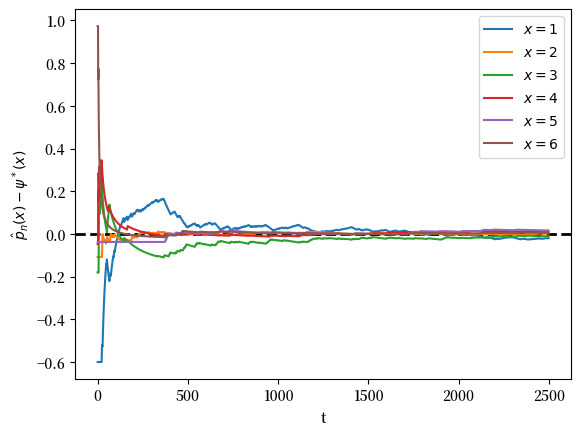

In [7]:
P = [[0.86, 0.11, 0.03, 0.00, 0.00, 0.00],
     [0.52, 0.33, 0.13, 0.02, 0.00, 0.00],
     [0.12, 0.03, 0.70, 0.11, 0.03, 0.01],
     [0.13, 0.02, 0.35, 0.36, 0.10, 0.04],
     [0.00, 0.00, 0.09, 0.11, 0.55, 0.25],
     [0.00, 0.00, 0.09, 0.15, 0.26, 0.50]]

ts_length = 2500
mc = qe.MarkovChain(P)
ψ_star = mc.stationary_distributions[0]
fig, ax = plt.subplots()
X = mc.simulate(ts_length, random_state=1)
# 将图中心对准0
ax.axhline(linestyle='dashed', lw=2, color='black')

for x0 in range(len(P)):
    # 计算每个状态的时间比例
    p_hat = (X == x0).cumsum() / np.arange(1, ts_length+1)
    ax.plot(p_hat - ψ_star[x0], label=f'$x = {x0+1} $')
    ax.set_xlabel('t')
    ax.set_ylabel(r'$\hat p_n(x) - \psi^* (x)$')

ax.legend()
plt.show()

## 练习

````{exercise}
:label: mc_ex1

Benhabib 等人 {cite}`benhabib_wealth_2019` 估计了如下的社会流动性转移矩阵：

$$
P:=
    \begin{bmatrix} 
        0.222 & 0.222 & 0.215 & 0.187 & 0.081 & 0.038 & 0.029 & 0.006 \\
        0.221 & 0.22 & 0.215 & 0.188 & 0.082 & 0.039 & 0.029 & 0.006 \\
        0.207 & 0.209 & 0.21 & 0.194 & 0.09 & 0.046 & 0.036 & 0.008 \\ 
        0.198 & 0.201 & 0.207 & 0.198 & 0.095 & 0.052 & 0.04 & 0.009 \\ 
        0.175 & 0.178 & 0.197 & 0.207 & 0.11 & 0.067 & 0.054 & 0.012 \\ 
        0.182 & 0.184 & 0.2 & 0.205 & 0.106 & 0.062 & 0.05 & 0.011 \\ 
        0.123 & 0.125 & 0.166 & 0.216 & 0.141 & 0.114 & 0.094 & 0.021 \\ 
        0.084 & 0.084 & 0.142 & 0.228 & 0.17 & 0.143 & 0.121 & 0.028
\end{bmatrix} 
$$

其中每个状态1到8对应于财富份额的百分位数：

$$
0-20 \%, 20-40 \%, 40-60 \%, 60-80 \%, 80-90 \%, 90-95 \%, 95-99 \%, 99-100 \%
$$

矩阵记录为 `P`，如下：

```python
P = [
    [0.222, 0.222, 0.215, 0.187, 0.081, 0.038, 0.029, 0.006],
    [0.221, 0.22,  0.215, 0.188, 0.082, 0.039, 0.029, 0.006],
    [0.207, 0.209, 0.21,  0.194, 0.09,  0.046, 0.036, 0.008],
    [0.198, 0.201, 0.207, 0.198, 0.095, 0.052, 0.04,  0.009],
    [0.175, 0.178, 0.197, 0.207, 0.11,  0.067, 0.054, 0.012],
    [0.182, 0.184, 0.2,   0.205, 0.106, 0.062, 0.05,  0.011],
    [0.123, 0.125, 0.166, 0.216, 0.141, 0.114, 0.094, 0.021],
    [0.084, 0.084, 0.142, 0.228, 0.17,  0.143, 0.121, 0.028]
    ]

P = np.array(P)
codes_B = ('1','2','3','4','5','6','7','8')
```

1. 展示该过程是渐近平稳的，并计算平稳分布的近似值。

2. 使用模拟来说明遍历性。

```` 

```{solution-start} mc_ex1
:class: dropdown
```
第1部分：

一种选择是对转移矩阵取幂。

In [8]:
P = [[0.222, 0.222, 0.215, 0.187, 0.081, 0.038, 0.029, 0.006],
     [0.221, 0.22,  0.215, 0.188, 0.082, 0.039, 0.029, 0.006],
     [0.207, 0.209, 0.21,  0.194, 0.09,  0.046, 0.036, 0.008],
     [0.198, 0.201, 0.207, 0.198, 0.095, 0.052, 0.04,  0.009],
     [0.175, 0.178, 0.197, 0.207, 0.11,  0.067, 0.054, 0.012],
     [0.182, 0.184, 0.2,   0.205, 0.106, 0.062, 0.05,  0.011],
     [0.123, 0.125, 0.166, 0.216, 0.141, 0.114, 0.094, 0.021],
     [0.084, 0.084, 0.142, 0.228, 0.17,  0.143, 0.121, 0.028]]

P = np.array(P)
codes_B = ('1','2','3','4','5','6','7','8')

np.linalg.matrix_power(P, 10)

array([[0.20254451, 0.20379879, 0.20742102, 0.19505842, 0.09287832,
        0.0503871 , 0.03932382, 0.00858802],
       [0.20254451, 0.20379879, 0.20742102, 0.19505842, 0.09287832,
        0.0503871 , 0.03932382, 0.00858802],
       [0.20254451, 0.20379879, 0.20742102, 0.19505842, 0.09287832,
        0.0503871 , 0.03932382, 0.00858802],
       [0.20254451, 0.20379879, 0.20742102, 0.19505842, 0.09287832,
        0.0503871 , 0.03932382, 0.00858802],
       [0.20254451, 0.20379879, 0.20742102, 0.19505842, 0.09287832,
        0.0503871 , 0.03932382, 0.00858802],
       [0.20254451, 0.20379879, 0.20742102, 0.19505842, 0.09287832,
        0.0503871 , 0.03932382, 0.00858802],
       [0.20254451, 0.20379879, 0.20742102, 0.19505842, 0.09287832,
        0.0503871 , 0.03932382, 0.00858802],
       [0.20254451, 0.20379879, 0.20742102, 0.19505842, 0.09287832,
        0.0503871 , 0.03932382, 0.00858802]])

对于此模型，当 $n \to \infty$ 时，$P^n$ 的行收敛到平稳分布：

In [9]:
mc = qe.MarkovChain(P)
ψ_star = mc.stationary_distributions[0]
ψ_star

array([0.20254451, 0.20379879, 0.20742102, 0.19505842, 0.09287832,
       0.0503871 , 0.03932382, 0.00858802])

第2部分：

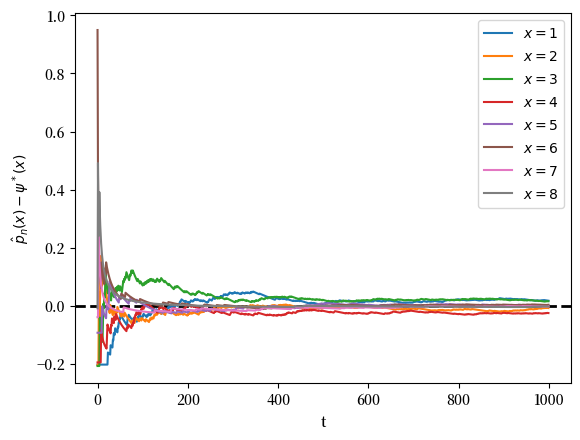

In [10]:
ts_length = 1000
mc = qe.MarkovChain(P)
fig, ax = plt.subplots()
X = mc.simulate(ts_length, random_state=1)
ax.axhline(linestyle='dashed', lw=2, color='black')

for x0 in range(len(P)):
    # 计算每个工人的时间比例
    p_hat = (X == x0).cumsum() / np.arange(1, ts_length+1)
    ax.plot(p_hat - ψ_star[x0], label=f'$x = {x0+1} $')
    ax.set_xlabel('t')
    ax.set_ylabel(r'$\hat p_n(x) - \psi^* (x)$')

ax.legend()
plt.show()

注意，花费在每个状态的时间比例收敛到平稳分布为该状态分配的概率。

```{solution-end}
```

```{exercise}
:label: mc_ex2

根据{ref}`上述讨论 <mc_eg1-2>`，如果一个工人的就业动态遵循以下随机矩阵

$$
P := 
\begin{bmatrix} 
1 - \alpha & \alpha \\
\beta & 1 - \beta
\end{bmatrix} 
$$

其中 $\alpha \in (0,1)$ 且 $\beta \in (0,1)$，那么，从长远来看，失业的时间比例将为

$$
p := \frac{\beta}{\alpha + \beta}
$$

换句话说，如果 $\{X_t\}$ 表示工人的马尔科夫链，那么 $\bar X_m \to p$ 当 $m \to \infty$，其中

$$
\bar X_m := \frac{1}{m} \sum_{t = 1}^m \mathbb{1}\{X_t = 0\}
$$

本练习要求您通过计算大 $m$ 时的 $\bar X_m$ 来说明收敛性，并检查其是否接近 $p$。

您会看到无论初始条件或 $\alpha, \beta$ 的选择如何，只要它们都位于 $(0,1)$ 区间内，此结论都成立。

结果应与我们在[这里](ergo)绘制的图类似。
```

```{solution-start} mc_ex2
:class: dropdown
```

我们将以图形方式解决此练习。

图显示了 $\bar X_m - p$ 的时间序列，对于两个初始条件。

当 $m$ 变大时，两个序列都收敛到零。

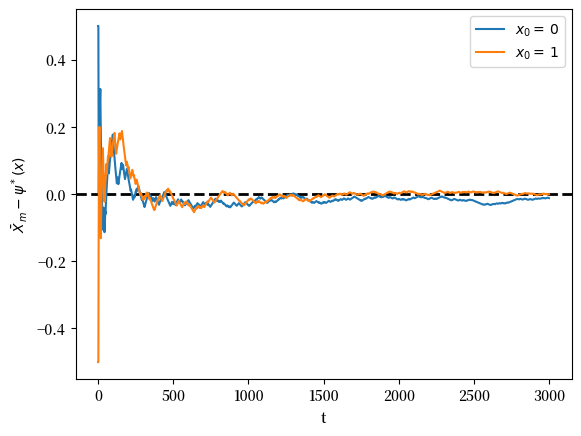

In [11]:
α = β = 0.1
ts_length = 3000
p = β / (α + β)

P = ((1 - α,       α),               # 注意：P 和 p 是不同的
     (    β,   1 - β))
mc = qe.MarkovChain(P)

fig, ax = plt.subplots()
ax.axhline(linestyle='dashed', lw=2, color='black')

for x0 in range(len(P)):
    # 为每个从 x0 开始的工人生成时间序列
    X = mc.simulate(ts_length, init=x0)
    # 计算每个 n 的失业时间比例
    X_bar = (X == 0).cumsum() / np.arange(1, ts_length+1)
    # 绘图
    ax.plot(X_bar - p, label=f'$x_0 = \, {x0} $')
    ax.set_xlabel('t')
    ax.set_ylabel(r'$\bar X_m - \psi^* (x)$')
    
ax.legend()
plt.show()

```{solution-end}
```

```{exercise}
:label: mc_ex3

在 `quantecon` 库中，通过检查链是否形成[强连通分量](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.components.is_strongly_connected.html)来测试不可约性。

另一种测试不可约性的方法是通过以下陈述：

当且仅当 $\sum_{k=0}^{n-1}A^k$ 是严格正矩阵时，$n \times n$ 矩阵 $A$ 是不可约的。

（参见{cite}`zhao_power_2012` 和 [此 StackExchange 讨论](https://math.stackexchange.com/questions/3336616/how-to-prove-this-matrix-is-a-irreducible-matrix)）

根据此断言，编写一个函数来测试不可约性。

``` 

```{solution-start} mc_ex3
:class: dropdown
```

In [12]:
def is_irreducible(P):
    n = len(P)
    result = np.zeros((n, n))
    for i in range(n):
        result += np.linalg.matrix_power(P, i)
    return np.all(result > 0)

让我们尝试一下。

In [13]:
P1 = np.array([[0, 1],
               [1, 0]])
P2 = np.array([[1.0, 0.0, 0.0],
               [0.1, 0.8, 0.1],
               [0.0, 0.2, 0.8]])
P3 = np.array([[0.971, 0.029, 0.000],
               [0.145, 0.778, 0.077],
               [0.000, 0.508, 0.492]])

for P in (P1, P2, P3):
    result = lambda P: '不可约' if is_irreducible(P) else '可约'
    print(f'{P}: {result(P)}')

[[0 1]
 [1 0]]: 不可约
[[1.  0.  0. ]
 [0.1 0.8 0.1]
 [0.  0.2 0.8]]: 可约
[[0.971 0.029 0.   ]
 [0.145 0.778 0.077]
 [0.    0.508 0.492]]: 不可约


```{solution-end}
```